<a href="https://colab.research.google.com/github/srmalasani/srmalasani/blob/master/SRR189408_scaffold_359_ShyamMalasani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this work is to identify novel transposable elements (TE) from various populations of _Drosophila melanogaster_ with genomic sequencing data that have been collected from around the world. Dr. Ellison created a computational workflow that assembles sequences from each population that do not match the _D. melanogaster_ reference genome. We need to further characterize these sequences. Some will be TEs that are already known but missing from the reference genome. Some will be other repetitive elements, like DNA satellites. Others will hopefully be novel TEs that are unique to specific _D. melanogaster_ populations. Follow the steps below to gather information about each sequence (aka scaffold). Record your results in the [Google Spreadsheet](https://docs.google.com/spreadsheets/d/1t2BPj9krh7KeqCOPzKpIyl6iPzwmP_58AJ5pLL2fJO4/edit?usp=sharing)

_Every time your notebook reconnects to a Runtime, you have to reinstall the software below_

In [ ]:
!pip install -U https://github.com/conda-incubator/condacolab/archive/cuda-version-12.tar.gz
import condacolab
condacolab.install()

     - 35.4 kB 4.8 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for condacolab: filename=condacolab-0.1.7-py3-none-any.whl size=7218 sha256=c7be9189e0c09d54b754489c1aa5c1d46a87635aad0a9822f374d9d97eb35bb5
  Stored in directory: /root/.cache/pip/wheels/40/52/76/1ad2aa50f9ab880cfc0e418db37f474f468d2920eab048baa2
Successfully built condacolab
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


In [ ]:
!mamba install -y -qq -c conda-forge -c bioconda biopython emboss blast bioconda::bioconductor-biostrings
!git clone https://github.com/clemgoub/TE-Aid.git
!apt-get install poppler-utils
!pip install pdf2image

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


### Before you begin
Rename your notebook by clicking `blank_notebook.ipynb` at the top of this webpage. Paste in your scaffold ID followed by an underscore and your name, for example:

`SRR189052_scaffold_467_ChrisEllison.ipynb`

### 1. Mount your Google Drive folder
_You will need to do this everytime your notebook reconnects to a Runtime._

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s /content/drive/MyDrive/novel_TE_project_Fall_2024/

Mounted at /content/drive


### 2. Analyze your scaffold
_You can find the sequence and population IDs in the Google spreadsheet_

In [ ]:
# @markdown ##### Fill in the information below and click the play button:
seqID="SRR189408_scaffold_359" #@param {type:"string"}
popID="DPGP2" #@param {type:"string"}

from Bio import SeqIO
from statistics import median
# GET COVERAGE
covfile="novel_TE_project_Fall_2024/" + popID + "_scaffold.cov"
(SRR,s,n) = seqID.split("_")
fh=open(covfile)
covlist=[]
seqCov=0
for line in fh:
  line=line.rstrip().split("\t")
  if line[0] == seqID:
    seqCov=float(line[2])
  elif SRR in line[0]:
    covlist.append(float(line[2]))
fh.close()
print("SEQUENCE ID:",seqID)
print("COPIES:",seqCov/median(covlist))

# GET CLUSTER INFO
clustfile="novel_TE_project_Fall_2024/" + popID + "_cluster.tsv"
fh=open(clustfile)
count=0
for line in fh:
  line=line.rstrip().split("\t")
  if line[0]==seqID:
    count+=1
fh.close()
print("CLUSTER:",seqID,"is in a cluster with a total of",count,"sequences.")

#GET CLASSIFICATION
classfile="novel_TE_project_Fall_2024/" + popID + ".classified.tsv"
fh=open(classfile)
classi="missing"
for line in fh:
  line=line.rstrip().split("\t")
  if line[1]==seqID:
    classi=line[2]
fh.close()
print("CLASSIFICATION:",classi)

# GET SCAFFOLD SEQUENCE
fastafile = "novel_TE_project_Fall_2024/" + popID + ".filtered.fa"
outfasta=seqID + ".fa"
found=""
for record in SeqIO.parse(fastafile, "fasta"):
    #record.id tells you the name of the scaffold
    if record.id == seqID:
      found=record
      SeqIO.write(record,outfasta,"fasta")
print("\nScaffold saved to FASTA file:", outfasta)
print("\n")
print("Scaffold sequence is below:\n")
print(found.format("fasta"))

SEQUENCE ID: SRR189408_scaffold_359
COPIES: 4.321428571428571
CLUSTER: SRR189408_scaffold_359 is in a cluster with a total of 1 sequences.
CLASSIFICATION: Drosophila melanogaster (taxid 7227)

Scaffold saved to FASTA file: SRR189408_scaffold_359.fa


Scaffold sequence is below:

>SRR189408_scaffold_359 scaffold_359
CATTCCTGCTGAACCGCTCTTCCGATCTCAGAGCGAAGCTTAAAAATAATGCCACGCCCA
TTTTAACCCACTCCTAAATTTTTTCAGAATTTTATTAGTAGTCCAAATTTCTAACGATTT
CTAGAATAAACGCCGCCGGAAAAAGGTTTATGCGACCAAGGACGGAATGGAAAATAAGAC
CGTTAGAATGGTGGATCAGAATAAACCTTGAAGGGACGCGAAATGGAGGGGCGGAAAAAC
CCAAATATTACGGCCTCTGGATTGGGTCCTTGGTTGGGTAGATAAATACTAACTTAAAAC
CTAACAAATAGAGACTCGGGACCGTGGAGTGGTGATCTTGCGGCTGGAAGGTGGGAGAGC
GAGAAAGCAAAGAGAGCTAGGCGAAAGCTTCCGCGCAAGCTCTGGCCTTTCACACTGCCG
GTGAGAACTTTCCGCTTTTCTAGCGTGAACAAATTTCAAAATGTATTTAATGGAAATTTT
ATGATCACTGACCTAATCAAAATAATGCATAAAGTTAACTCCATTTTCGATATTTCGCAA
CGAGCGATAACTCGCCGCGACAGATTCTTAGTTATTTAGACGCCATATACGAGCGAAAGA
GTCTCACGTCACAGTTAGCAGTTCCCTGCAAGCTGCAAGGTGAGACGACACTTTTTTGTC
ATTTTAATACGT

### 3. BLAST against TE proteins
_This runs a BLAST search within your notebook that will report whether your scaffold contains sequence(s) with similarity to known TE proteins_

**NOTE:** if there is no output produced when you run this cell, it means that no TE proteins were found in your sequence. In this case, please enter "NA" for the corresponding cell in the spreadsheet

In [ ]:
#@markdown _Filename of your scaffold FASTA file produced in Step 2._

Scaffold_Fasta="SRR189408_scaffold_359.fa" #@param {type:"string"}
!blastx -query $Scaffold_Fasta -db novel_TE_project_Fall_2024/RepeatPeps.lib -evalue 1e-4 -outfmt 6

SRR189408_scaffold_359	R1_DPe_pol#LINE/R1	52.874	87	41	0	1820	1560	809	895	5.35e-34	96.3
SRR189408_scaffold_359	R1_DPe_pol#LINE/R1	65.714	35	12	0	2020	1916	725	759	5.35e-34	48.1
SRR189408_scaffold_359	R1_DPe_pol#LINE/R1	76.000	25	5	1	1911	1837	774	797	5.35e-34	40.4
SRR189408_scaffold_359	Copia#LTR/Copia	70.690	58	17	0	1104	1277	1097	1154	1.43e-29	81.3
SRR189408_scaffold_359	Copia#LTR/Copia	56.140	57	10	1	1277	1402	1155	1211	1.43e-29	60.1
SRR189408_scaffold_359	Copia#LTR/Copia	66.667	21	7	0	1402	1464	1217	1237	1.43e-29	28.5
SRR189408_scaffold_359	Copia#LTR/Copia	70.833	48	14	0	677	820	124	171	4.67e-23	67.0
SRR189408_scaffold_359	Copia#LTR/Copia	71.875	32	9	0	525	620	67	98	4.67e-23	46.6
SRR189408_scaffold_359	Copia#LTR/Copia	62.500	24	9	0	822	893	174	197	4.67e-23	34.3
SRR189408_scaffold_359	R1_DM_pol#LINE/R1	49.020	102	51	1	1865	1560	797	897	5.87e-29	96.7
SRR189408_scaffold_359	R1_DM_pol#LINE/R1	48.571	35	18	0	2020	1916	728	762	5.87e-29	35.8
SRR189408_scaffold_359	R1_DM_pol#LINE/R1	72.72

### 4. BLAST against the _nt_ database
_The nt database is massive, so this search must be performed on the BLAST [website](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&BLAST_SPEC=GeoBlast&PAGE_TYPE=BlastSearch)_

1. Copy your scaffold sequence above and paste it into the website form as the query
2. Make sure _Nucleotide collection (nr/nt)_ is selected as the database, and click BLAST
3. Take a screenshot of the _Sequences producing significant alignments_ table that includes the top 10 hits
4. Click the _Taxonomy_ tab and take a screenshot of that table
5. See the Basecamp Message board for instructions on what to do with your screenshots


![BLAST Hit Table - nt](https://public.3.basecamp.com/p/MsTzAPbJAWd9MjnwvrykxcwX/upload/download/SRR189408_scaffold_359.png?disposition=attachment)

![BLAST Taxonomy - nt](https://public.3.basecamp.com/p/cnkWL6LkVYdpNsSpLdSMhaPS/upload/download/SRR189408_scaffold_359.png?disposition=attachment)

### 5. BLAST against the _WGS_ database
Follow the same instructions as above with the following exceptions:
1. Select _Whole-genome shotgun contigs_ for the database.
2. Specify `Drosophilidae (taxid:7214)` for Organism
3. Note that the _Taxonomy_ tab is not available for this search, so only take one screenshot

![BLAST Hit Table - wgs](https://public.3.basecamp.com/p/ev7UrLqQJEywa9sSuRpnpA5q/upload/download/SRR189408_scaffold_359.png?disposition=attachment)

You also need to display the _hit table_ from your _WGS_ search.

1. On the WGS BLAST results page, click the `Alignments` tab
2. Click the `Download` dropdown menu and select `Hit Table (CSV)`
3. In your Colab notebook, click the folder icon on the left and then the upload button which looks like a piece of paper with a arrow on it.
4. Find the Hit Table file that you downloaded to your computer and rename it: _SRAXXXXXX_scaffold_XXX.csv_
5. Upload the CSV file to Basecamp: _Docs & Files -> Screenshots -> BLAST Hit Table (WGS)_ and create a public link as you did with the screenshots.
6. Paste the public URL into the cell below and run the cell to create the Hit Table.
7. Click the blue table icon on the right of the output to convert it to an interactive table.

In [ ]:
#@markdown _Basecamp URL for the Hit Table CSV file._

URL="https://3.basecamp.com/4836321/p/ivxgSdUhbJnBWMsKi1H64PVt/vault/7958246504" #@param {type:"string"}
!wget -O temp.csv $URL >& wget.log
import pandas as pd
df = pd.read_csv("temp.csv",names=["Query","Target","%identity","Align_Len","Mismatch","Gapopen","Qstart","Qend","Sstart","Send","Evalue","Bitscore"])
df

,Query,Target,%identity,Align_Len,Mismatch,Gapopen,Qstart,Qend,Sstart,Send,Evalue,Bitscore
0,<!DOCTYPE html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<html lang=""en""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"class=""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"data-theme=""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"data-controller=""platform color-scheme""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70,"<svg width=""100"" height=""23"" viewBox=""0 0 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,</a>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,</footer>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,</body>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('%identity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Align_Len').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['%identity'].value_counts()
    for x_label, grp in df.groupby('Target')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Target')
_ = plt.ylabel('%identity')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Align_Len'].value_counts()
    for x_label, grp in df.groupby('%identity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('%identity')
_ = plt.ylabel('Align_Len')

### 6. CENSOR search against RepBase TE database

_This search must be performed on the CENSOR [website](https://www.girinst.org/censor/)_
1. Copy your scaffold sequence above and paste it in the Query box
2. Select _Drosophila_ as the Sequence Source
3. Click _Submit Sequence_.

_It will look like nothing is happening but you just have to wait a few minutes. Eventually there should be a screen that says **Done** with a link to the results._

#### Take a screenshot of the match diagram and table


![CENSOR match diagram and table](https://public.3.basecamp.com/p/m9nFmQKj5ypnoVQbkpPjZdE6/upload/download/SRR189408_scaffold_359.png?disposition=attachment)

#### Annotation of Repbase Sequences
1. Find the CENSOR match with the highest score
2. Scroll down on the results webpage until you see the section _Annotation of Repbase Sequences_
3. Copy the annotation information for the highest scoring CENSOR match and paste it in the text cell below.

```
ID   R1-2_DM     repbase;    DNA;    INV; 3216 BP.
XX
AC   .
XX
DT   11-NOV-2002 (Rel. 7.10, Created)
DT   19-MAY-2005 (Rel. 10.06, Last updated, Version 2)
XX
DE   R1-2_DM is a non-LTR retrotransposon - a partial consensus.
XX
KW   Non-LTR Retrotransposon; Transposable Element; ORF1; ORF2;
KW   R1 clade; R1-2_DM; endonuclease; reverse transcriptase.
XX
NM   R1-2_DM.
XX
OS   Drosophila melanogaster
OC   Eukaryota; Metazoa; Ecdysozoa; Arthropoda; Hexapoda; Insecta;
OC   Pterygota; Neoptera; Endopterygota; Diptera; Brachycera;
OC   Muscomorpha; Ephydroidea; Drosophilidae; Drosophila; Sophophora;
OC   melanogaster group; melanogaster subgroup.
XX
RN   [1]
RP   1-3216
RA   Kapitonov V.V. and Jurka J.;
RT   "R1-2_DM, a family of R1-like non-LTR retrotransposons from D.
RT   melanogaster.";
RL   Repbase Reports 2(10), 27-27 (2002).
XX
DR   [1] (Consensus)
XX
CC   R1-2_DM belongs to the R1 clade of non-LTR retrotransposons.
CC   R1-2_DM is a separate family. Members of this family are ~92%
CC   identical to the R1-2_DM consensus sequence. Therefore,
CC   this family was active a few million years ago. R1-2_DM is only
CC   70%
CC   identical to R1_DM. The sequence is incomplete, its several
CC   hundred
CC   bp long termini are not reconstructed yet.
CC   There are ~15 copies of R1-2_DM present in the sequenced portion
CC   of
CC   the D. melanogaster genome.
CC   The R1-2_DM consensus sequence includes two open reading frames
CC   that
CC   encode a C-terminal portion of R1-2_DM-ORF1p (positions 1-716)
CC   and N-terminal portion of R1-2_DM-ORF2p (positions 719-3216)
CC   FW_DM-ORF2p (positions 1256-3832). These proteins are most close
CC   to
CC   the R1-like DNA/RNA-binding and endonuclease/reverse
CC   transcriptase
CC   proteins, respectively.
XX
FH   Key           Location/Qualifiers
FT   CDS           3..716
FT                 /product="R1-2_DM-ORF1p"
FT                 /translation="CSAVVMCDDPSIPGKQSAERVRKEVAPALGVRVHEVR
FT                 ELKCGGAVIRTPSVSEMKKVVANKKLAEVGLKVQPKKSQRPKVQVFDVDSG
FT                 IQPDGGIVRQQFKEEFSPAAFMKEMHLNTKPWSVTDGERANLTLEVDEKAL
FT                 NVLEQTGRVYIKWFSYRCRSLVHTYACHRCLGFDHKVSQCRVKETICPQCG
FT                 QAGHTAPRCTNPVDCRNCRFKGHPSRHSMLSFTCPIYGAVLARVNARH"
FT   CDS           719..3216
FT                 /product="R1-2_DM-ORF2p"
FT                 /translation="MFSFLQANCGRGRAPTIELXVRLRDSGHLFALVQEPY
FT                 VDLAGRITGVPSGMRVFSDRRGKAAVYVDSTDSICMPIEPLVTEFGVCVSV
FT                 TGSFGSIFLCSVYCQFNTGLEQYLGYLDAVLLLASRTPVILGLDANAVSPM
FT                 WFSKLPERAQGSANYLRGELLSDWIQGCRAGVLNMPCDAFTFETPYARSDI
FT                 DVTLTNDAASTCATYDWRVDEWDLSDHNIINVVVTRDPPNTVESFAPVPSW
FT                 NFSAARWRPFEDEVTRLASELPDEFADTPLDDQVSAVRSLVHSVCDQVLGR
FT                 RRPKTARKIVWWTAELSSKRQEVRRLRRRLQTARARASHDAEQLVSQLREI
FT                 SDQYKELILKYKEDNWRRLVGENKDDPWGQVFRICRGRKRTTELGCLRXGG
FT                 RQYVTWHDCAGVLLRTFFPFSSFRHPLSFLKRFHHRLSSEVDACVARLKSR
FT                 RSPGMDGITAVIFKAVWRAIPEHITAFYSRCIRSGYLPSKWKRTIAVALLK
FT                 GSDKDRSDPASYRGICPLLFVFGKVLEGIMVNRLKDVLPDGSRWQFGFREG
FT                 RCVEDAWRHVVSTVAANQAQYMLGIFVDFKGAFDHVEWDVVMRRLIDSGCR
FT                 EASLWRSFFSGRSASLVSRYGEVTVPVTRGCPQGSISGPFIWNLMMDSLLQ
FT                 RLEPLRGFSALADDLLLFVEGTRIVLESKGEQLMSVVGAWEVGVAVLTSKT
FT                 ALLLGHFAQSRHTTVRFAGASLPYVDKYRYLGVTVVERLNVLPHIKSLRDR
FT                 LTGVVQALARVLCVDWGLSPRARRTIYAGLMVPCALFGASVWYDGPSSAMR
FT                 HLVSCQRRILLGCLPVCRTVSTVAMQVLXGA"
XX
SQ   Sequence 3216 BP; 692 A; 827 C; 943 G; 751 T; 3 other;

//
```

### 7. Run TE-Aid

query:                         SRR189408_scaffold_359.fa
ref genome:                    novel_TE_project_Fall_2024/dmel-all-chromosome-r6.22.fasta
TE -> genome blastn e-value:   10e-8
full length min ratio:         0.9
hits transparency:             0.3
full length hits transparency: 0.9
RepeatPeps is downloaded and formatted, blastp-ing...
[1] "R: ploting genome blastn results and computing coverage..."
[1] "consensus length: 2045 bp"
[1] "R: ploting self dot-plot and orf/protein hits..."
null device 
          1 
Done! The graph (.pdf) can be found in the output folder: .


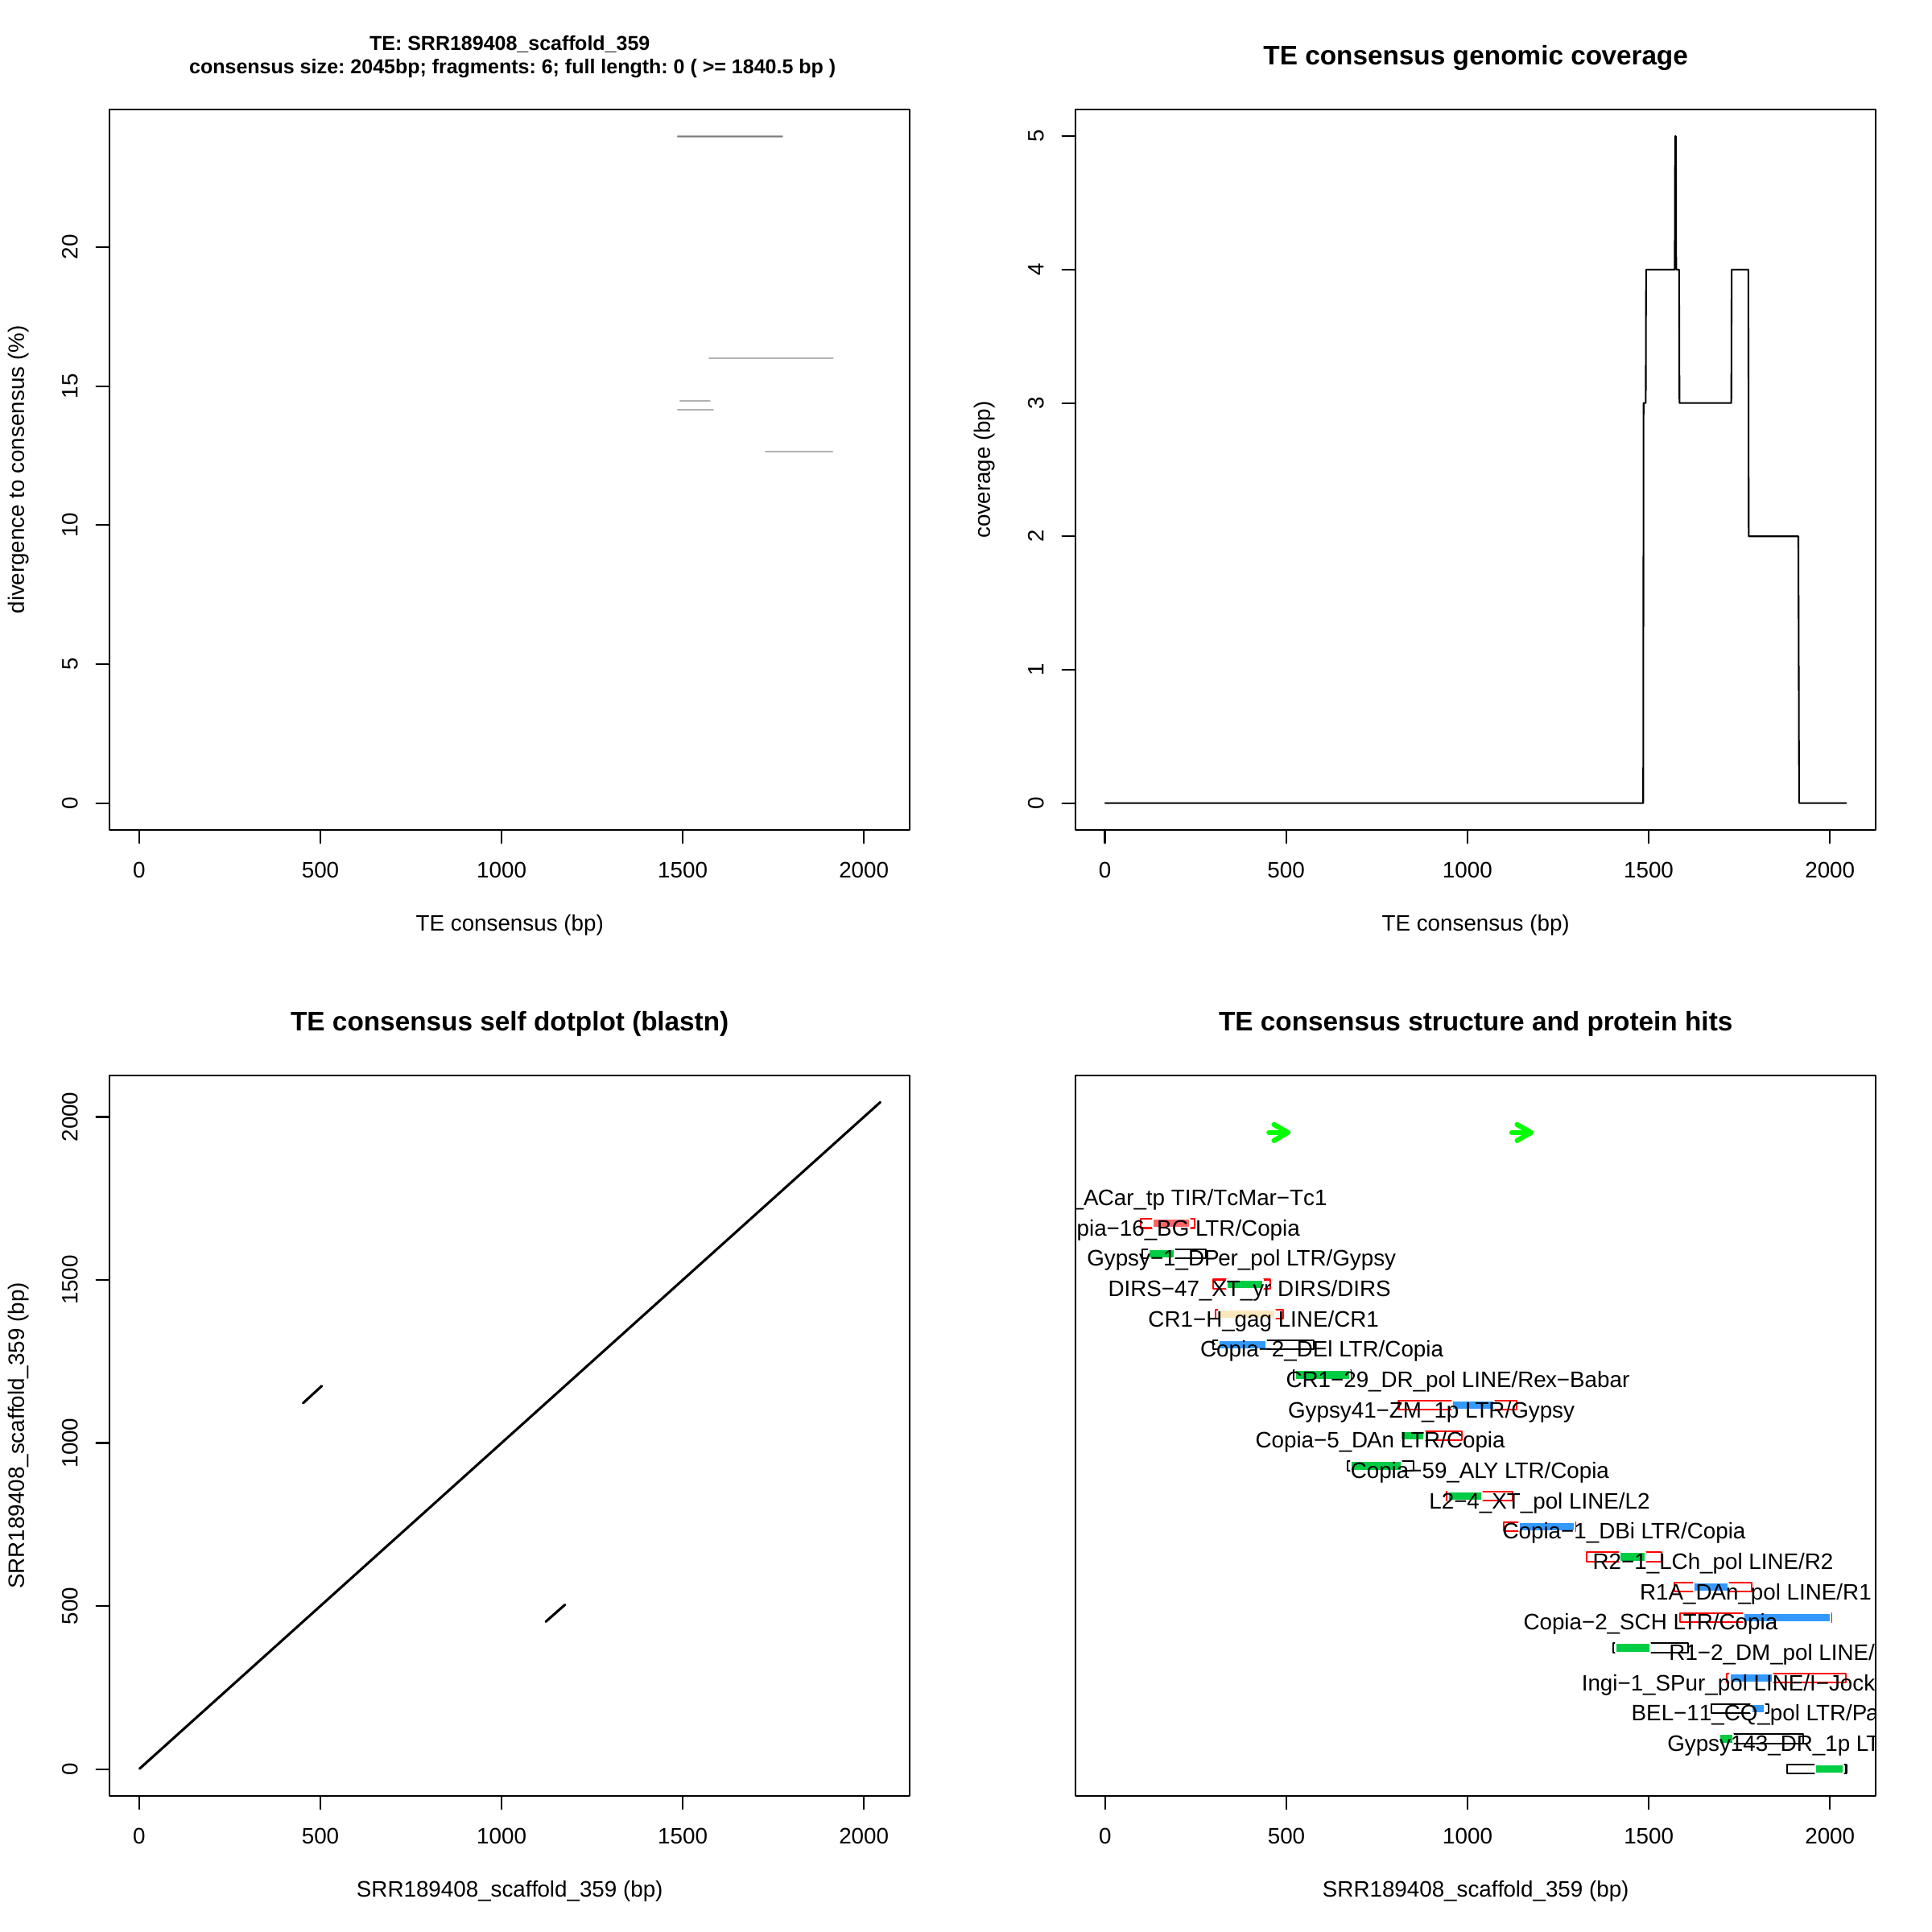

In [ ]:
#@markdown [TE-AID](https://github.com/clemgoub/TE-Aid) produces four plots:
#@markdown 1. (top left)  Each line represents a single TE copy/fragment. The plot shows which part of the consensus is covered by each copy and the sequence identity between them.
#@markdown 2. (top right) Genomic coverage of the consensus: TEs whose copies are frequently truncated will show differences in coverage across the consensus
#@markdown 3. (bottom left) Dotplot comparing the consensus to itself. This plot is useful for identifying structural features such as Long Terminal Repeats (LTRs) or Terminal Inverted Repeats (TIRs)
#@markdown 4. (bottom right) Structural and coding features including: TIR and LTR suggestions, open reading frames (ORFs) and TE protein hit annotations.

#@markdown _Filename of your scaffold FASTA file produced in Step 2._
Scaffold_Fasta_File = "SRR189408_scaffold_359.fa" #@param {type:"string"}
out=Scaffold_Fasta_File+".c2g.pdf"


!TE-Aid/TE-Aid -m 150 -q $Scaffold_Fasta_File -g novel_TE_project_Fall_2024/dmel-all-chromosome-r6.22.fasta

from pdf2image import convert_from_path
pdf=out
images = convert_from_path(pdf)
images[0]


### 8. Fill in the spreadsheet with information about your scaffold.

1. **Scaffold** The ID of the sequence/scaffold
2. **Population** The population that was sequenced
3. **Copies** Estimated TE copy number (reported in Step #2)
4. **Classification** Inferred species of origin (reported in Step #2)
5. **Cluster size** Number of individuals where this sequence was found (reported in Step #2)
6. **BLAST TE proteins** Top hit from the BLAST against RepBase proteins
6. **BLAST_nt_hit** E-value of top hit from _nt_ database
7. **BLAST_nt_query_cover** Query Coverage (%) of top hit from _nt_ database
8. **BLAST_nt_per_ident** Percent Identity of top hit from _nt_ database
9. **BLAST_wgs_hit** E-value of top hit from _WGS_ database
10. **BLAST_wgs_query_cover** Query Coverage (%) of top hit from _WGS_ database
11. **BLAST_wgs_per_ident** Percent Identity of top hit from _WGS_ database
6. **Censor name** The Name field from the highest scoring match
7. **Censor score** The score from the highest scoring match
8. **Censor length** The match length using the first two From..To fields from the highest scoring match



### 9. Save your completed notebook to GitHub
1. Select File -> Save a copy in GitHub
2. Look for `novel_TE_project` under the Repository dropdown menu
3. Make sure your notebook is named with the scaffold ID followed by an underscore and your name
4. Click `Ok`
5. If make additional changes to the notebook, repeat the steps above to save the revised version (with the same filename) in GitHub